# Project Name: Google-Quantum AI with Introduction to CIRQ
# Contributor: Rajeev Singh Sisodiya

#CIRQ
 Cirq is a framework for writing quantum algorithms for noisy intermediate scale quantum (NISQ) devices. Roughly speaking, NISQ devices are those with O(100) qubits that can enact O(1000) gates. Because the resources for NISQ devices are so constrained, we believe that a framework for writing programs on these devices needs to be aware of all of the architectural properties of the device on which the algorithm is written. This is in contrast to other frameworks where there is a clean separation between the abstract model being used and the details of the device.

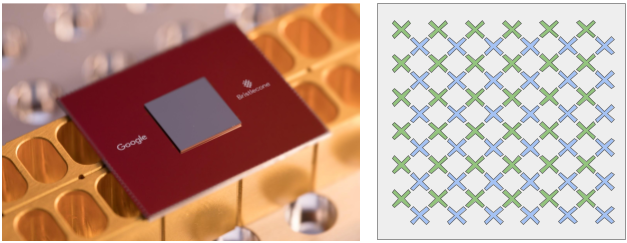

In [ ]:
!!pip install cirq

In [ ]:
!pip install 'cirq-core[contrib]'

In [3]:
import cirq_google
print(cirq_google.Sycamore)
# should print:
#                                              (0, 5)───(0, 6)
#                                              │        │
#                                              │        │
#                                     (1, 4)───(1, 5)───(1, 6)───(1, 7)
#                                     │        │        │        │
#                                     │        │        │        │
#                            (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
#                            │        │        │        │        │        │
#                            │        │        │        │        │        │
#                   (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
#                   │        │        │        │        │        │        │        │
#                   │        │        │        │        │        │        │        │
#          (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
#          │        │        │        │        │        │        │        │
#          │        │        │        │        │        │        │        │
# (5, 0)───(5, 1)───(5, 2)───(5, 3)───(5, 4)───(5, 5)───(5, 6)───(5, 7)───(5, 8)
#          │        │        │        │        │        │        │
#          │        │        │        │        │        │        │
#          (6, 1)───(6, 2)───(6, 3)───(6, 4)───(6, 5)───(6, 6)───(6, 7)
#                   │        │        │        │        │
#                   │        │        │        │        │
#                   (7, 2)───(7, 3)───(7, 4)───(7, 5)───(7, 6)
#                            │        │        │
#                            │        │        │
#                            (8, 3)───(8, 4)───(8, 5)
#                                     │
#                                     │
#                                     (9, 4)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

# Hello Qubit

In [4]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")

In [5]:
# Pick a qubit.
qubit = cirq.GridQubit(0, 0)

# Create a circuit that applies a square root of NOT gate, then measures the qubit.
circuit = cirq.Circuit(cirq.X(qubit) ** 0.5, cirq.measure(qubit, key='m'))
print("Circuit:")
print(circuit)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("Results:")
print(result)

Circuit:
(0, 0): ───X^0.5───M('m')───
Results:
m=11000010101010110011


# Qubits, Operations, Moments and Circuits
In Cirq, circuits are represented by a Circuit object. Conceptually:

A Circuit is a collection of Moments.
A Moment is a collection of Operations that all act during the same abstract time slice.
An Operation is an effect that operates on a specific subset of Qubits.
The most common type of Operation is a Gate applied to several qubits (a "GateOperation").
The Qubits of a circuit are implicitly defined by the operations - you can't allocate qubits to a Circuit.

These ideas are illustrated by the below diagram, where time goes from left to right, horizontal lines are different qubits, operations acting on qubits are the boxes (sometimes spanning multiple qubits) and a moment is a group of operations that "happen at the same time".

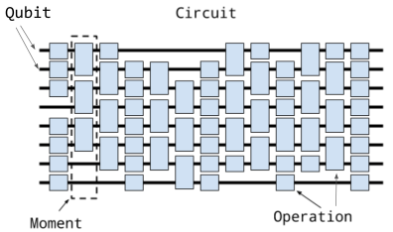

In [6]:
import cirq

# Pick a qubit.
qubit = cirq.GridQubit(0, 0)

# Create a circuit
circuit = cirq.Circuit(
    cirq.X(qubit)**0.5,  # Square root of NOT.
    cirq.measure(qubit, key='m')  # Measurement.
)
print("Circuit:")
print(circuit)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("Results:")
print(result)

Circuit:
(0, 0): ───X^0.5───M('m')───
Results:
m=11101001001010110100


# Cirq basics

In [7]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

import cirq_google

# Qubits
The first part of creating a quantum circuit is to define a set of qubits (also known as a quantum register) to act on.

Cirq has three main ways of defining qubits:

cirq.NamedQubit: used to label qubits by an abstract name.
cirq.LineQubit: qubits labelled by number in a linear array.
cirq.GridQubit: qubits labelled by two numbers in a rectangular lattice.
Here are some examples of defining each type of qubit.

In [8]:
# Using named qubits can be useful for abstract algorithms
# as well as algorithms not yet mapped onto hardware.
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Line qubits can be created individually
q3 = cirq.LineQubit(3)

# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)

# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4, 5)

# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)

There are also pre-packaged sets of qubits called Devices. These are qubits along with a set of rules for how they can be used. A cirq.Device can be used to ensure that two-qubit gates are only applied to qubits that are adjacent in the hardware, and other constraints.

In [9]:
print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

# Gates and operations

The next step is to use the qubits to create operations that can be used in the circuit. Cirq has two concepts that are important to understand here:

A Gate is an effect that can be applied to a set of qubits.
An Operation is a gate applied to a set of qubits.
For instance, cirq.H is the quantum Hadamard and is a Gate object. cirq.H(cirq.LineQubit(1)) is an Operation object and is the Hadamard gate applied to a specific qubit (line qubit number 1).

Many textbook gates are included within cirq. cirq.X, cirq.Y, and cirq.Z refer to the single-qubit Pauli gates. cirq.CZ, cirq.CNOT, cirq.SWAP are a few of the common two-qubit gates. cirq.measure is a macro to apply a MeasurementGate to a set of qubits. You can find more, as well as instructions on how to create your own custom gates, on the Gates documentation page.

In [10]:
# Example gates
cnot_gate = cirq.CNOT
pauli_z = cirq.Z

# Use exponentiation to get square root gates.
sqrt_x_gate = cirq.X**0.5

# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Create two qubits at once, in a line.
q0, q1 = cirq.LineQubit.range(2)

# Example operations
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)

# You can also use the gates you specified earlier.
cnot_op = cnot_gate(q0, q1)
pauli_z_op = pauli_z(q0)
sqrt_x_op = sqrt_x_gate(q0)
sqrt_sqrt_y_op = sqrt_sqrt_y(q0)

# Circuits and moments
 A Circuit is a collection of Moments. A Moment is a collection of Operations that all act during the same abstract time slice. Each Operation must be applied to a disjoint set of qubits compared to each of the other Operations in the Moment. A Moment can be thought of as a vertical slice of a quantum circuit diagram.

Circuits can be constructed in several different ways. By default, Cirq will attempt to slide your operation into the earliest possible Moment when you insert it. You can use the append function in two ways:

By appending each operation one-by-one:

In [11]:
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(3)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))
print(circuit)

0: ───H───

1: ───H───

2: ───H───


Or by appending some iterable of operations. A preconstructed list works:

In [12]:
circuit = cirq.Circuit()
ops = [cirq.H(q) for q in cirq.LineQubit.range(3)]
circuit.append(ops)
print(circuit)

0: ───H───

1: ───H───

2: ───H───


A generator that yields operations also works. This syntax will be used often in documentation, and works both with the cirq.Circuit() initializer and the cirq.Circuit.append() function.

In [13]:
# Append with generator
circuit = cirq.Circuit()
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
print(circuit)
# Initializer with generator
print(cirq.Circuit(cirq.H(q) for q in cirq.LineQubit.range(3)))

0: ───H───

1: ───H───

2: ───H───
0: ───H───

1: ───H───

2: ───H───


Note that all of the Hadamard gates are pushed as far left as possible, and put into the same Moment since none overlap.

If your operations are applied to the same qubits, they will be put in sequential, insertion-ordered moments. In the following example, the two-qubit gates overlap, and are placed in consecutive moments.

In [14]:
print(cirq.Circuit(cirq.SWAP(q, q + 1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


Sometimes, you may not want Cirq to automatically shift operations all the way to the left. To construct a circuit without doing this, you can create the circuit moment-by-moment or use a different InsertStrategy.

In [15]:
# Creates each gate in a separate moment by passing an iterable of Moments instead of Operations.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


# Circuits and devices
One important consideration when using real quantum devices is that there are often constraints on circuits that are able to be run on the hardware. Device objects specify these constraints and can be used to validate your circuit to make sure that it contains no illegal operations.

In [16]:
# Create some qubits.
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)

# Create operations using the Sycamore gate, which is supported by the Sycamore device.
# However, create operations for both adjacent and non-adjacent qubit pairs.
adjacent_op = cirq_google.SYC(q0, q1)
nonadjacent_op = cirq_google.SYC(q0, q2)

# A working circuit for the Sycamore device raises no issues.
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)

# A circuit using invalid operations.
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
    cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
    print(e)

Qubit pair is not valid on device: (cirq.GridQubit(5, 6), cirq.GridQubit(4, 5)).


# Simulation
The results of the application of a quantum circuit can be calculated by a Simulator. Cirq comes bundled with a simulator that can calculate the results of circuits up to about a limit of 20 qubits. It can be initialized with cirq.Simulator().

There are two different approaches to using a simulator:

simulate(): When classically simulating a circuit, a simulator can directly access and view the resulting wave function. This is useful for debugging, learning, and understanding how circuits will function.
run(): When using actual quantum devices, we can only access the end result of a computation and must sample the results to get a distribution of results. Running the simulator as a sampler mimics this behavior and only returns bit strings as output.
Next simulate a 2-qubit "Bell State":

In [17]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

# Initialize Simulator
s = cirq.Simulator()

print('Simulate the circuit:')
results = s.simulate(bell_circuit)
print(results)

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

# Sample the circuit
samples = s.run(bell_circuit, repetitions=1000)

Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


# Virtual Machine Simulation
Cirq also provides the Quantum Virtual Machine, which is a simulated virtual version of quantum hardware devices. It consists of two primary components:

A virtual Engine interface that enables you to verify and run circuits with the same interface that quantum hardware would have.
A set of noise models that try to realistically replicate the noise present in actual Google quantum hardware devices.
The QVM is intended to serve as a replacement for the Google quantum hardware, in two cases:

Running your circuit on a QVM can give an approximation of how your circuit runs under the influence of hardware-like noise. This can be useful to help you reconfigure or change your circuit to be less impacted by noise when run on actual quantum hardware.

During the preparation process before running your circuit(s) on hardware, you can seamlessly use a QVM to test that your workflow or pipeline works before eventually switching to the nearly-identical hardware interface.

# Visualizing Results
When you use run() to get a sample distribution of measurements, you can directly graph the simulated samples as a histogram with cirq.plot_state_histogram.

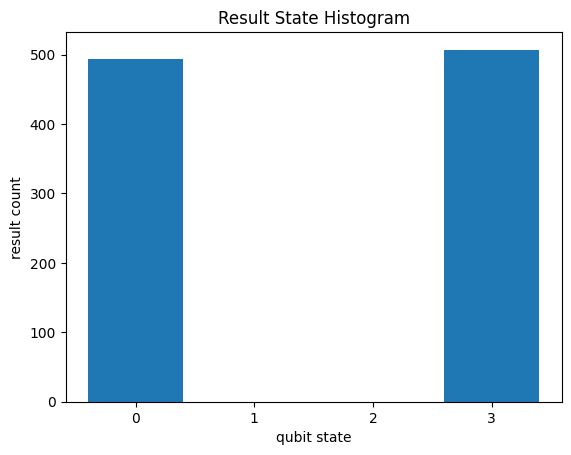

In [18]:
import matplotlib.pyplot as plt

cirq.plot_state_histogram(samples, plt.subplot())
plt.show()

However, this histogram has some empty qubit states, which may become problematic if you work with more qubits. To graph sparse sampled data, first get the Counts from your results with its histogram() function, and pass that to cirq.plot_state_histogram. By collecting the results into counts, all the qubit states that were never seen are ignored.

Counter({3: 507, 0: 493})


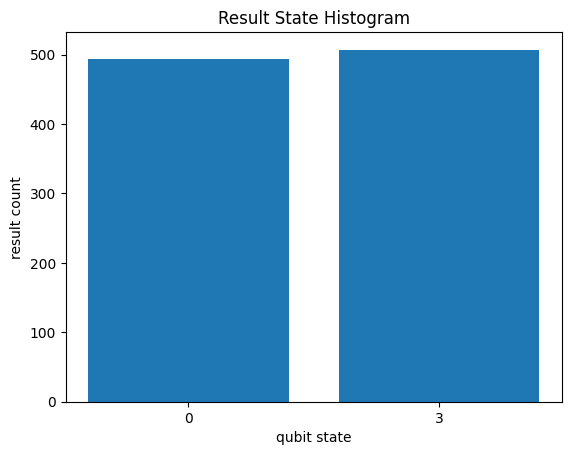

In [19]:
# Pull of histogram counts from the result data structure
counts = samples.histogram(key='result')
print(counts)

# Graph the histogram counts instead of the results
cirq.plot_state_histogram(counts, plt.subplot())
plt.show()

A histogram over the states that were actually observed can often be more useful when analyzing results. To learn more about the available options for creating result histograms, see the State Histograms page.

# Using parameter sweeps
Cirq circuits allow for gates to have symbols as free parameters within the circuit. This is especially useful for variational algorithms, which vary parameters within the circuit in order to optimize a cost function, but it can be useful in a variety of circumstances.

For parameters, Cirq uses the library sympy to add sympy.Symbol as parameters to gates and operations.

Once the circuit is complete, you can fill in the possible values of each of these parameters with a Sweep. There are several possibilities that can be used as a sweep:

cirq.Points: A list of manually specified values for one specific symbol as a sequence of floats.

cirq.Linspace: A linear sweep from a starting value to an ending value.

cirq.ListSweep: A list of manually specified values for several different symbols, specified as a list of dictionaries.

cirq.Zip and cirq.Product: Sweeps can be combined list-wise by zipping them together or through their Cartesian product.

A parameterized circuit and sweep together can be run using the simulator or other sampler by changing run() to run_sweep() and adding the sweep as a parameter.

Here is an example of sweeping an exponent of a X gate:

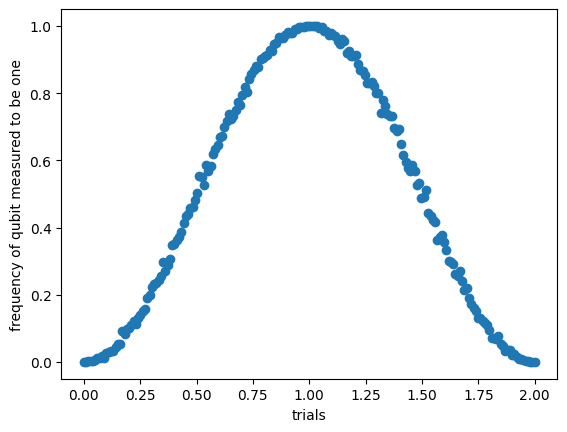

In [20]:
import sympy

# Perform an X gate with variable exponent
q = cirq.GridQubit(1, 1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data})
plt.xlabel("trials")
plt.ylabel("frequency of qubit measured to be one")
plt.show()

# Unitary matrices and decompositions
Many quantum operations have unitary matrix representations. This matrix can be accessed by applying cirq.unitary(operation) to that operation. This can be applied to gates, operations, and circuits that support this protocol and will return the unitary matrix that represents the object.

In [21]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


# Decompositions
Many gates can be decomposed into an equivalent circuit with simpler operations and gates. This is called decomposition and can be accomplished with the cirq.decompose protocol.

For instance, a Hadamard H gate can be decomposed into X and Y gates:

In [22]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(global_shift=-0.25).on(cirq.LineQubit(0))]


Another example is the 3-qubit Toffoli gate, which is equivalent to a controlled-controlled-X gate. Many devices do not support three qubit gates, so it is important to decompose them into one and two qubit gates.

In [23]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───


The above decomposes the Toffoli into a simpler set of one-qubit gates and two-qubit CZ gates at the cost of lengthening the circuit considerably.

# Transformers
The last concept in this tutorial is the transformer. A transformer can take a circuit and modify it. Usually, this will entail combining or modifying operations to make it more efficient and shorter, though a transformer can, in theory, do any sort of circuit manipulation.

For example, the cirq.merge_single_qubit_gates_to_phxz transformer will take consecutive single-qubit operations and merge them into a single PhasedXZ operation.

In [24]:
q = cirq.GridQubit(1, 1)
c = cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) ** 0.25)
print(c)
c = cirq.merge_single_qubit_gates_to_phxz(c)
print(c)

(1, 1): ───X^0.25───Y^0.25───T───
(1, 1): ───PhXZ(a=0.304,x=0.333,z=0.142)───


Other transformers can assist in transforming a circuit into operations that are native operations on specific hardware devices.

# Create a Circuit
A typical way to create a Circuit is shown below.

In [25]:
"""Creating a circuit."""
# Define three qubits.
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")
c = cirq.NamedQubit("c")

# Define a list of operations.
ops = [cirq.H(a), cirq.H(b), cirq.CNOT(b, c), cirq.H(b)]

# Create a circuit from the list of operations.
circuit = cirq.Circuit(ops)
print("Circuit:\n")
print(circuit)

Circuit:

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────


# Unpacking the circuit
We can unpack this a bit and see all of the components for the circuit.

The first thing we do is pick some qubits to use. There are many different types of qubits in Cirq, and you can define your own by inheriting from the cirq.Qid class. There's nothing inherently special or magical about these quantum id types such as cirq.NamedQubit. They simply identify what you wish to operate on, which is relevant when you are targeting a specific device. For example, if we were creating a circuit for the Sycamore device and wanted to refer to the qubit in the left-most position, we would use cirq.GridQubit(5, 0). (See the first diagram of the Sycamore device we printed out.) For simplicity, in the previous cell we defined cirq.NamedQubits which are simply qubits that can be identified by a name.

Next, we encounter the object cirq.H which is a Hadamard gate with unitary

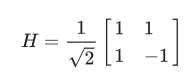

In Cirq, cirq.H is an instance of the cirq.HPowGate class, which itself is a subclass of Gate (along with other classes). We can use Cirq to see the unitary matrix of Gate objects as follows.

In [26]:
import cirq

"""Get the unitary of a gate, here the Hadamard gate."""
cirq.unitary(cirq.H)

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

We see that this agrees with the unitary for the Hadamard gate above.

Gate objects have the ability to be applied "on" one or more qubits. There are two ways to do this for gates, either using the on method or by directly calling the gate on the qubits as if the gate were a function and the qubits were arguments. For example to apply the H on qubit a we can say cirq.H.on(a) or cirq.H(a).

Once you have a collection of operations, you can construct a Circuit by passing the operations into the constructor for a Circuit:

In [ ]:
ops = [list of operations]
circuit = cirq.Circuit(ops)

In [40]:
"""Print out the moments in a circuit."""
print("Circuit:\n")
print(circuit)

# Inspecting individual moments.
print("\nMoments in the circuit:\n")
for i, moment in enumerate(circuit):
    print(f'Moment {i}: \n{moment}')

Circuit:

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────

Moments in the circuit:

Moment 0: 
  ╷ None
╶─┼──────
a │ H
  │
b │ H
  │
Moment 1: 
  ╷ None
╶─┼──────
b │ @
  │ │
c │ X
  │
Moment 2: 
  ╷ None
╶─┼──────
b │ H
  │


We see that this circuit consists of three moments. For even more on the underlying structure of a circuit, we can print the circuit's repr. This returns a more detailed (and usually less readable) expression.

In [41]:
"""Print the repr of a circuit."""
print(repr(circuit))

cirq.Circuit([
    cirq.Moment(
        cirq.H(cirq.NamedQubit('a')),
        cirq.H(cirq.NamedQubit('b')),
    ),
    cirq.Moment(
        cirq.CNOT(cirq.NamedQubit('b'), cirq.NamedQubit('c')),
    ),
    cirq.Moment(
        cirq.H(cirq.NamedQubit('b')),
    ),
])


Although it is less readable, the usefulness of printing the repr is that it includes all the gory details which can be useful when debugging. The repr is also a valid python expression that evaluates to the circuit. For example, if we notice that a circuit generated in some complicated way triggers a bug in a simulator, copy-pasting the generated circuit's repr into a test, and then working from there, is a simple way to decouple the reproduction of the bug from the circuit generation code.

More ways to create Circuits

In [42]:
"""Creating a circuit from generator functions."""


def xor_swap(a, b):
    """Swaps two qubits with three CNOTs."""
    yield cirq.CNOT(a, b)  # |a> |b> --> |a> |a ^ b>
    yield cirq.CNOT(b, a)  # |a> |a ^ b> --> |a ^ a ^ b> | a ^ b> = |b>|a^b>
    yield cirq.CNOT(a, b)  # |b> |a ^ b> --> |b>|a ^ b ^ b> = |b> |a>


cirq.Circuit(xor_swap(a, b))

a: ───@───X───@───
      │   │   │
b: ───X───@───X───

# Insert strategies
You may have noticed that there is a hole in what we've explained so far. We have been passing a one-dimensional sequence of operations, but the output is a two-dimensional circuit (a list-of-lists-of-operations). There is a degree of freedom that hasn't been account for. Specifically, how does Cirq choose the moment that each operation will be placed within?

The answer is the concept of a cirq.InsertStrategy. An InsertStrategy defines how Operations are placed in a Circuit when requested to be inserted at a given location. Here a location is identified by the index of the Moment in the Circuit that operations should be placed before.

In [43]:
"""Appending operations with InsertStrategy.EARLIEST."""
# Create an empty circuit.
circuit = cirq.Circuit()

# Append an operation.
# Note: InsertStrategy.EARLIEST is used by default if not otherwise specified.
circuit.append([cirq.CZ(a, b)])

# Append more operations.
# Note: InsertStrategy.EARLIEST is used by default if not otherwise specified.
circuit.append([cirq.H(a), cirq.H(b), cirq.H(c)])

# Display the circuit.
print("Circuit:\n")
print(circuit)

Circuit:

a: ───@───H───
      │
b: ───@───H───

c: ───H───────


After creating the first moment with a CZ gate, the second append uses the InsertStrategy.EARLIEST strategy. The H on a and b cannot slide back, while the H on c can and so ends up in the first Moment.

While InsertStrategy.EARLIEST is the default strategy, the second most important strategy is InsertStrategy.NEW_THEN_INLINE, defined as follows:

InsertStrategy.NEW_THEN_INLINE: For the first operation, add it to a new Moment the insertion point. Attempts to add the operation after the first operation to insert into the moment just before the desired insert location. But, if there's already an existing operation affecting any of the qubits touched by the operation to insert, a new moment is created instead and this Moment is the one that is subsequently used for insertions.

In [44]:
"""Appending operations with InsertStrategy.NEW_THEN_INLINE."""
# Create an empty circuit.
circuit = cirq.Circuit()

# Append an operation.
circuit.append([cirq.CZ(a, b)], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

# Append more operations.
circuit.append([cirq.H(a), cirq.H(b), cirq.H(c)], strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

# Display the circuit.
print("Circuit:\n")
print(circuit)

Circuit:

a: ───@───H───
      │
b: ───@───H───

c: ───────H───


# Simulations of a Circuit
Now that we know how to construct Circuits in Cirq, let's see how to execute them on a simulator. First we create a simple circuit to simulate in the following cell.

In [45]:
"""Get a circuit to simulate."""


def basic_circuit(measure=True):
    """Returns a simple circuit with some one- and two-qubit gates,
    as well as (optionally) measurements.
    """
    # Gates we will use in the circuit.
    sqrt_x = cirq.X**0.5
    cz = cirq.CZ

    # Yield the operations.
    yield sqrt_x(a), sqrt_x(b)
    yield cz(a, b)
    yield sqrt_x(a), sqrt_x(b)
    if measure:
        yield cirq.measure(a, b)


# Create a circuit including measurements.
circuit = cirq.Circuit(basic_circuit())
print(circuit)

a: ───X^0.5───@───X^0.5───M───
              │           │
b: ───X^0.5───@───X^0.5───M───


The main simulator in Cirq is the cirq.Simulator. The general pattern of simulation is to instantiate this simulator, then pass in a circuit to either the run or simulate methods (more on this below).

In [46]:
"""Example of simulating a circuit in Cirq."""
# Get a simulator.
simulator = cirq.Simulator()

# Pass the circuit to the simulator.run method.
result = simulator.run(circuit, repetitions=1)
print("Measurement results:")
print(result)

Measurement results:
a,b=1, 1


Above we used the run method of the simulator. In Cirq, run methods mimic the actual hardware in that they don't give one access to unphysical objects like the wavefunction. The repetitions argument is how many times to sample from the circuit.

If one wants to get the wavefunction, the simulate methods can be used as shown below.

In [48]:
"""Simulating a circuit with the `simulate` method."""
# Get a circuit without measurements.
circuit = cirq.Circuit(basic_circuit(measure=False))

# Simulate the circuit.
result = simulator.simulate(circuit, qubit_order=[a, b])
import numpy as np
# Print the final state vector (wavefunction).
print("State vector:")
print(np.around(result.final_state_vector, 3))

# Print the state vector in Dirac notation.
print("\nDirac notation:")
print(result.dirac_notation())

State vector:
[0.5+0.j  0. +0.5j 0. +0.5j 0.5+0.j ]

Dirac notation:
0.5|00⟩ + 0.5j|01⟩ + 0.5j|10⟩ + 0.5|11⟩


# Repetitions and histograms
As mentioned, the simulator run methods also take an option for repeating the circuit, namely, the repetitions argument. If the measurements in the circuit are terminal and all other operations are unitary, this simulator is optimized to not recompute the state vector before sampling from the circuit.

Counter({1: 263, 0: 259, 2: 248, 3: 230})


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

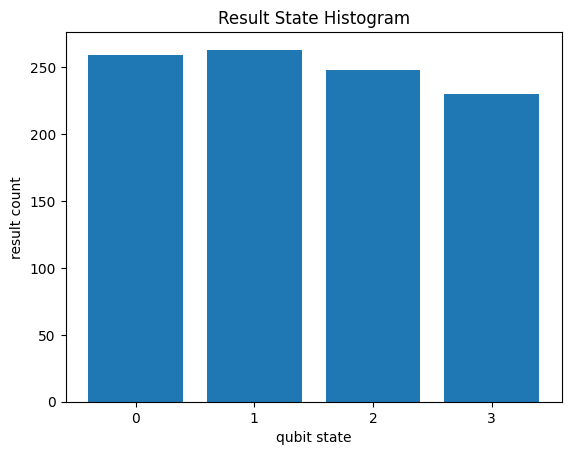

In [49]:
"""Simulate a circuit using 1000 repetitions."""
# Get a circuit with terminal measurements to simulate.
circuit = cirq.Circuit(basic_circuit())

# Sample from the circuit 1000 times.
result = simulator.run(circuit, repetitions=1000)

# Get a histogram of measurement results.
print(result.histogram(key="a,b"))

# Plot a state histogram of the result.
cirq.plot_state_histogram(result)

The histogram method can also be given a fold_func argument, in order to group measurement results under some key before counting them up. For example, we can group by whether or not the two measurement results agreed:

In [50]:
print(
    result.histogram(
        key="a,b", fold_func=lambda bits: "agree" if bits[0] == bits[1] else "disagree"
    )
)

Counter({'disagree': 511, 'agree': 489})


# Gates
Cirq comes with a plethora of common quantum gates. Here we show a few of them.

In [67]:
"""Examples of common gates defined in Cirq."""
# Get some qubits.
q0, q1, q2 = cirq.LineQubit.range(3)

# Get a bunch of common gates defined in Cirq.
ops = [
    cirq.X(q0),  # Pauli-X.
    cirq.Y(q1),  # Pauli-Y.
    cirq.Z(q2),  # Pauli-Z.
    cirq.CZ(q0, q1),  # Controlled-Z gate.
    cirq.CNOT(q1, q2),  # Controlled-X gate.
    cirq.H(q0),  # Hadamard gate.
    cirq.T(q1),  # T gate.
    cirq.S(q2),  # S gate.
    cirq.CCZ(q0, q1, q2),  # Controlled CZ gate.
    cirq.SWAP(q0, q1),  # Swap gate.
    cirq.CSWAP(q0, q1, q2),  # Controlled swap gate.
    cirq.CCX(q0, q1, q2),  # Toffoli (CCNOT) gate.
    cirq.ISWAP(q0, q1),  # ISWAP gate.
    cirq.Rx(rads=0.5 * np.pi)(q0),  # Rotation about X.
    cirq.Ry(rads=0.5 * np.pi)(q1),  # Rotation about Y.
    cirq.Rz(rads=0.5 * np.pi)(q2),  # Rotation about Z.
    cirq.X(q0) ** 0.5,  # Sqrt of NOT gate.
]

# Display a circuit with all of these operations.
print(cirq.Circuit(ops))

0: ───X───@───H───────@───×───@───@───iSwap──────Rx(0.5π)───X^0.5───
          │           │   │   │   │   │
1: ───Y───@───@───T───@───×───×───@───iSwap──────Ry(0.5π)───────────
              │       │       │   │
2: ───Z───────X───S───@───────×───X───Rz(0.5π)──────────────────────


For each of these gates, you can figure out how they act on the computational basis by calling cirq.unitary on the gate. For example, to see the unitary of CNOT, we can do:

In [68]:
"""Get the unitary of CNOT."""
print(cirq.unitary(cirq.CNOT))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


For single qubit gates, we have named gates like cirq.H for the Hadmard gate as well as the single qubit rotation gates defined as follows.

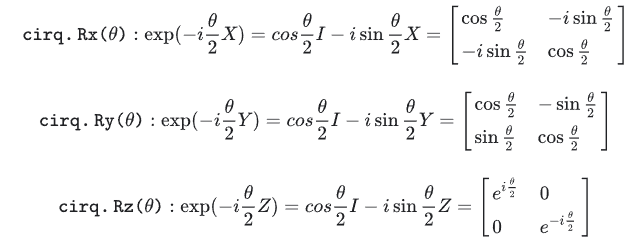

If we apply cirq.Rx to a state we can see how it rotates the state. To do this let us introduce a new simulate method simulate_moment_steps. This allows us to simulate the circuit Moment by Moment. At each point we can access the state. For example here we can use this to create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the
image.png state:

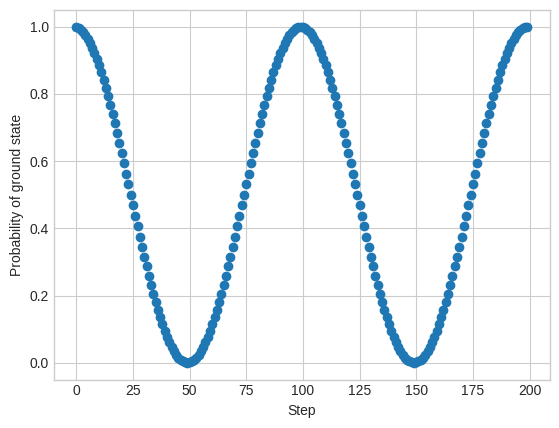

In [69]:
"""Plot the probability of measuring a qubit in the ground state."""
# Get a qubit.
a = cirq.NamedQubit('a')

# Get a circuit of a bunch of X rotations.
num_angles = 200
circuit = cirq.Circuit([cirq.Rx(rads=np.pi / 50.0)(a) for theta in range(num_angles)])

# List to store probabilities of the ground state.
probs = []

# Step through the simulation results.
for step in simulator.simulate_moment_steps(circuit):
    prob = np.abs(step.state_vector(copy=True)) ** 2
    probs.append(prob[0])

# Plot the probability of the ground state at each simulation step.
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(probs, 'o')
plt.xlabel("Step")
plt.ylabel("Probability of ground state");

Above we have given ourselves direct access to the wave function and calculated the exact probabilities. Suppose we wanted to sample from the wave function at each point instead.

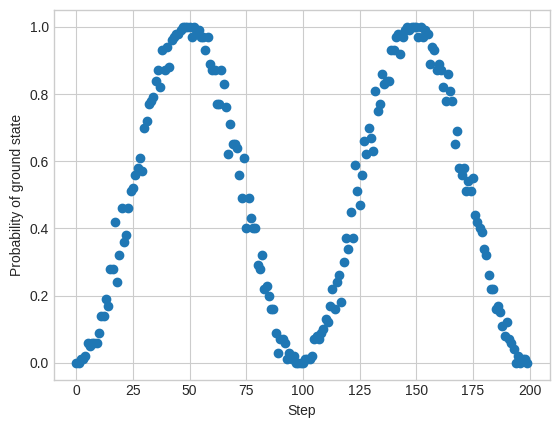

In [70]:
"""Plot the probability of measuring a qubit in the ground state by sampling."""
# Number of times to sample.
repetitions = 100

# List to store the probability of the ground state.
sampled_probs = []

for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
    samples = step.sample([a], repetitions=repetitions)
    prob = np.sum(samples, axis=0)[0] / repetitions
    sampled_probs.append(prob)


# Plot the probability of the ground state at each simulation step.
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(sampled_probs, 'o')
plt.xlabel("Step")
plt.ylabel("Probability of ground state");

# Custom gates
Suppose there is a gate that you want Cirq to support, but it is not implemented in Cirq. How do you go about defining your new gate?

Cirq aims to be Pythonic. One way in which it does this is that it relies on Python's protocol pattern. Protocols are similar to interfaces, in that they define a collection of methods that an object must support to implement a protocol, but different in that this requirement is more informal and not a part of a class or interface declaration. An object supports a protocol if it implements the methods that the protocol defines. You're probably familiar with this if you've ever done something like defined your own Container in Python. To do this for an object you simply define the __contains__, __setitem__, and __getitem__ methods on your object, and then you can use this object anywere the Container protocol is supported.

Let's see how this works for defining a custom gate. The gate we will define is a single qubit gate that has only rational amplitudes. This is based on the famous 3, 4, 5 triangle you may remember from a long ago math class:

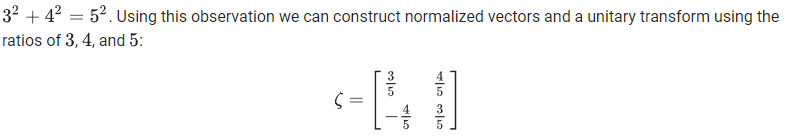

Below is a simple implementation of this gate in Cirq. To do this we simply define a class that inherits from cirq.Gate and implements the cirq.SupportsUnitary protocol by implementing the _unitary_(self) method. We also define an optional __str__ representation which Cirq will use when printing this gate out in a circuit diagram.

In [71]:
"""Example of defining a custom gate in Cirq."""


class RationalGate(cirq.Gate):
    def _num_qubits_(self) -> int:
        return 1

    def _unitary_(self):
        return np.array([[3 / 5, 4 / 5], [-4 / 5, 3 / 5]])

    def __str__(self):
        return 'ζ'

We can now use this custom gate just like any other gate in Cirq.

In [72]:
"""Using the custom gate in a circuit."""
a = cirq.NamedQubit('a')
rg = RationalGate()
print(cirq.Circuit(rg(a)))

a: ───ζ───


We can also get its unitary, as shown below, because the RationalGate defines a _unitary_ method.



In [73]:
print(cirq.unitary(rg))

[[ 0.6  0.8]
 [-0.8  0.6]]


Let's check that we can use this gate in a simulation.

In [74]:
"""Simulate a circuit with a custom gate."""
circuit = cirq.Circuit(rg(a))
simulator = cirq.Simulator()
result = simulator.simulate(circuit)
print(result.final_state_vector)

[ 0.6+0.j -0.8+0.j]


# Decompose Protocol
Cirq also supports creating custom "composite" gates which can be defined in terms of other "simpler" gates. The custom gate should implement the cirq.SupportsDecompose protocol by implementing _decompose_ method.

Note that implementing _decompose_ on custom gates is convenient because if a gate has its _decompose_ method defined, other protocols, like cirq.SupportsUnitary, are automatically supported by composing the values obtained from the decomposed operations.

Below we show how one can construct a custom gate that can be decomposed into two gates.

In [75]:
"""Example of a custom gate which supports the decompose protocol."""


class HXGate(cirq.Gate):
    def _num_qubits_(self) -> int:
        return 1

    def _decompose_(self, qubits):
        return cirq.H(*qubits), cirq.X(*qubits)

    def __str__(self):
        return 'HX'

Even though the above gate does not define a _unitary_ method, we can use it in a circuit as follows.



In [76]:
"""Use the gate in a circuit."""
HX = HXGate()

a = cirq.NamedQubit('a')
circuit = cirq.Circuit(HX(a))
assert cirq.has_unitary(HX(a))
print(circuit, cirq.unitary(circuit), sep="\n\n")

a: ───HX───

[[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]


The symbol HX is a single gate, not a product of two gates. We can decompose the HXGate using cirq.decompose as shown below.



In [77]:
"""Decompose the gate."""
print(cirq.Circuit(cirq.decompose(circuit)))

a: ───Y^0.5───X───X───


Note that this not only decomposed the HX gate into H and X, it also decomposed H into Y**0.5 and X. In order to decompose only once, one can use cirq.decompose_once:



In [78]:
"""Decompose the gate once."""
print(cirq.Circuit(cirq.decompose_once(HX(a))))

a: ───H───X───


# Gatesets
In many contexts, the notion of what gate you can apply is defined either by the physical hardware you are running or perhaps by the quantum error correcting code you are working with. In quantum computing we typically talk about gate sets and work with respect to a given gate set.

Cirq provides a cirq.Gateset abstraction to create custom gatesets, which is useful for

Describing the set of allowed gates in a human readable format
Validating a given gate / optree against the set of allowed gates
For example, a gateset that supports any x/y/z single qubit rotation and CNOT can be defind as follows:

In [79]:
# Insert a type (eg: cirq.XPowGate) to accept all instances of that type.
# Insert an instance (eg: cirq.CNOT) to accept only one specific instance of the type.
gateset = cirq.Gateset(cirq.XPowGate, cirq.YPowGate, cirq.ZPowGate, cirq.CNOT)

# Valid gates and operations are accepted by the gateset.
assert cirq.CNOT(*cirq.LineQubit.range(2)) in gateset
assert cirq.X**0.5 in gateset

# Arbitrary powers of cirq.CXPowGate are not part of the gateset.
assert cirq.CNOT**0.5 not in gateset

# Parameterized Circuits
In addition to circuit gates with fixed values, Cirq also supports parameterized gates with symbolic values via sympy. These are placeholder values, such as sympy.Symbol('x'), that will only be resolved at run-time. For simulators these values are resolved by providing a ParamResolver. A ParamResolver provides a map from the Symbol's name to its assigned value.

In [80]:
"""Define a circuit with parameterized gates."""
# Import sympy for parameterized values.
import sympy as sp

# Get qubits to use in the circuit.
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

# Define a parameterized value.
val = sp.Symbol("s")

# Create a circuit.
circuit = cirq.Circuit(cirq.X.on(a) ** val, cirq.X.on(b) ** val)

# Display it.
print("Circuit with parameterized gates:\n")
print(circuit)

Circuit with parameterized gates:

a: ───X^s───

b: ───X^s───


When we simulate this circuit, we must provide a param_resolver as mentioned.



In [81]:
"""Simulate the circuit at multiple parameter values."""
simulator = cirq.Simulator()

# Simulate the circuit for several values of the parameter.
num_params = 5
for y in range(num_params):
    result = simulator.simulate(circuit, param_resolver={"s": y / 4.0})
    print(f"s={y}: {np.around(result.final_state_vector, 2)}\n")

s=0: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]

s=1: [ 0.6 +0.6j   0.25-0.25j  0.25-0.25j -0.1 -0.1j ]

s=2: [0. +0.5j 0.5+0.j  0.5+0.j  0. -0.5j]

s=3: [-0.1 +0.1j   0.25+0.25j  0.25+0.25j  0.6 -0.6j ]

s=4: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]



Here we see that the Symbol is used in two gates, and then the resolver provides this value at run time.

Parameterized values are most useful in defining what we call a cirq.Sweep. A cirq.Sweep is a collection of parameter resolvers. Our cirq.Simulator and cirq.Sampler (for real devices) interfaces support parameter sweeps. The run_sweep method allows the user to a parameterized circuit with each of the configurations. Within each run, the user might specify the number of repetitions as well which determines the sample size for each run. Running parameter sweeps returns a list of cirq.Results, one per set of fixed parameter values and repetitions. Example:

In [82]:
"""Simulate the circuit at multiple parameter values."""
# Get a list of param resolvers.
num_params = 5
resolvers = [cirq.ParamResolver({'s': y / 8.0}) for y in range(num_params)]

# Add measurements to the circuit.
circuit.append([cirq.measure(a), cirq.measure(b)])

# Simulate the circuit using run_sweep.
results = simulator.run_sweep(program=circuit, params=resolvers, repetitions=10)

for i, result in enumerate(results):
    print(f'params: {result.params.param_dict}\n{result}\n')

params: OrderedDict([('s', 0.0)])
a=0000000000
b=0000000000

params: OrderedDict([('s', 0.125)])
a=0000010000
b=0000000000

params: OrderedDict([('s', 0.25)])
a=0001000010
b=0001000010

params: OrderedDict([('s', 0.375)])
a=0001100001
b=0101000100

params: OrderedDict([('s', 0.5)])
a=1111000111
b=1010000011



A very similar method to run_sweep is the sample method. This returns a pandas DataFrame, where each column is a parameter/measurement key and each row is a repetition.

In [83]:
results = simulator.sample(program=circuit, params=resolvers, repetitions=10)

results.describe()

,s,a,b
count,50.000000,50.000000,50.000000
mean,0.250000,0.220000,0.180000
std,0.178571,0.418452,0.388088
min,0.000000,0.000000,0.000000
25%,0.125000,0.000000,0.000000
50%,0.250000,0.000000,0.000000
75%,0.375000,0.000000,0.000000
max,0.500000,1.000000,1.000000


Above we passed in a list of ParamResolvers to the params parameter of run_sweep and sample. But one can also pass in a Sweepable. There are some useful methods for generating Sweepables, for example to generate an equally spaced set of ParamResolvers one can use Linspace

In [84]:
"""Alternative method of getting a sequence of param resolvers."""
linspace = cirq.Linspace(start=0, stop=1.0, length=11, key='x')
for p in linspace:
    print(p)

cirq.ParamResolver({'x': 0.0})
cirq.ParamResolver({'x': 0.1})
cirq.ParamResolver({'x': 0.2})
cirq.ParamResolver({'x': 0.3})
cirq.ParamResolver({'x': 0.4})
cirq.ParamResolver({'x': 0.5})
cirq.ParamResolver({'x': 0.6})
cirq.ParamResolver({'x': 0.7})
cirq.ParamResolver({'x': 0.8})
cirq.ParamResolver({'x': 0.9})
cirq.ParamResolver({'x': 1.0})


# Noise
In addition to circuits with unitary gates, Cirq also has support for modeling noisy quantum evolutions. This is useful when modeling what will happen when running on actual hardware.

Cirq currently supports noise that fits within the context of operator sum representations of noise (a.k.a quantum operations, quantum dyanamical maps, superoperators, etc). This formalism models the evolution of a density matrix via

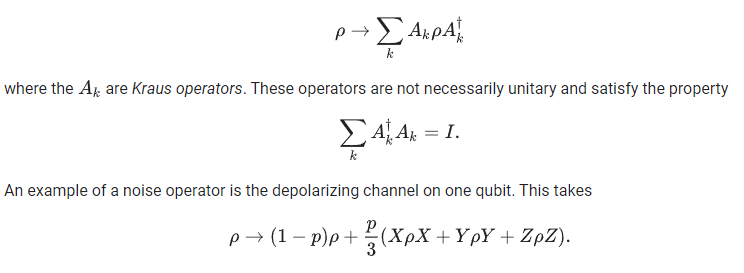

In Cirq we can define such a channel and use it in a quantum circuit:



In [85]:
"""Create a circuit with a depolarizing channel."""
circuit = cirq.Circuit(cirq.depolarize(0.2)(a), cirq.measure(a))
print(circuit)

a: ───D(0.2)───M───


Previously we saw that gates could implement that _unitary_ protocol, and by doing so they could be used to perform wave function simulation. For noise the gates implement the _kraus_ protocol. Classes that implement this protocol return the Krauss operators on their _kraus_ method. Thus



In [86]:
for i, kraus in enumerate(cirq.kraus(cirq.depolarize(0.2))):
    print(f"Kraus operator {i} is:", kraus, sep="\n", end="\n\n")

Kraus operator 0 is:
[[0.89442719 0.        ]
 [0.         0.89442719]]

Kraus operator 1 is:
[[0.        +0.j 0.25819889+0.j]
 [0.25819889+0.j 0.        +0.j]]

Kraus operator 2 is:
[[0.+0.j         0.-0.25819889j]
 [0.+0.25819889j 0.+0.j        ]]

Kraus operator 3 is:
[[ 0.25819889+0.j  0.        +0.j]
 [ 0.        +0.j -0.25819889+0.j]]



The Kraus operators are often more conveniently represented in a Pauli basis. We can do this in Cirq as shown below.



In [87]:
for i, kraus in enumerate(cirq.kraus(cirq.depolarize(0.2))):
    pauli_ex = cirq.expand_matrix_in_orthogonal_basis(kraus, cirq.PAULI_BASIS)
    print(f"Kraus operator {i} is:", pauli_ex, sep="\n", end="\n\n")

Kraus operator 0 is:
0.894*I

Kraus operator 1 is:
0.258*X

Kraus operator 2 is:
0.258*Y

Kraus operator 3 is:
0.258*Z



In addition to the wavefunction simulator, Cirq also has a density matrix simulator. Instead of keeping track of the wavefunction, this simulator keeps track of the density matrix. It has the same run and simulate type methods. For example we can use this to simulate depolarizing channel and return the final density matrix of the system.



In [88]:
"""Example of simulating a noisy circuit with the density matrix simulator."""
# Circuit to simulate.
circuit = cirq.Circuit(cirq.depolarize(0.2)(a))
print(f'Circuit:\n{circuit}\n')

# Get the density matrix simulator.
simulator = cirq.DensityMatrixSimulator()

# Simulate the circuit and get the final density matrix.
matrix = simulator.simulate(circuit).final_density_matrix
print(f'Final density matrix:\n{matrix}')

Circuit:
a: ───D(0.2)───

Final density matrix:
[[0.8666666 +0.j 0.        +0.j]
 [0.        +0.j 0.13333333+0.j]]


One thing to note is that the density matrix simulator simulates measurement statistically, and not as a channel where the outcome is not known. Consider the following example.



In [89]:
"""Simulating a circuit with measurements using the DensityMatrixSimulator."""
# Get a circuit with measurements.
circuit = cirq.Circuit(cirq.depolarize(0.5)(a), cirq.measure(a))

# Simulate with the density matrix multiple times.
dmat1 = simulator.simulate(circuit).final_density_matrix
dmat2 = simulator.simulate(circuit).final_density_matrix

print(np.allclose(dmat1, dmat2))

True


# Monte carlo simulations
Density matrix simulations are more expensive than pure state wave function simulations. However some channels allow an interpreation of randomly applying one of a fixed set of unitaries with differing probabilites. For example the depolarizing channel above can be interpretted as:

With probability 1-p apply the identity to the state, and
with probability p apply one of the three Pauli matrices X,Y or Z with equal probability.

Channels that can be interpretted in this form can be simulating using a wavefunction simulator: when this channel is simulated the simulation will sample a unitary with the appropriate probability.

For channels of these type, the channel can, instead of implementing the _kraus_ protocol, implement the _mixture_ protocol:

In [90]:
"""Use the cirq.mixture protocol on the cirq.depolarize channel."""
for p, u in cirq.mixture(cirq.depolarize(0.2)):
    print(f"prob = {p}\nunitary: \n{u}\n")

prob = 0.8
unitary: 
[[1. 0.]
 [0. 1.]]

prob = 0.06666666666666667
unitary: 
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

prob = 0.06666666666666667
unitary: 
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

prob = 0.06666666666666667
unitary: 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]



In fact the depolarizing channel does not implement _kraus_. Instead it only implements _mixture_ and the cirq.kraus method notices this and derives the kraus operators from the mixture.



In [91]:
"""Check if cirq.depolarize has _kraus_ and _mixture_ methods."""
# Get a depolarizing channel.
d = cirq.depolarize(0.2)

# Check if it has _kraus_ implemented.
print(f"does cirq.depolarize(0.2) have _kraus_? {'yes' if getattr(d, '_kraus_', None) else 'no'}")

# Check if it has _mixture_ implemented.
print(
    f"does cirq.depolarize(0.2) have _mixture_? {'yes' if getattr(d, '_mixture_', None) else 'no'}"
)

does cirq.depolarize(0.2) have _kraus_? no
does cirq.depolarize(0.2) have _mixture_? yes


When channels implement mixture then, as we said, we can use the wavefunction simulator:



In [92]:
"""Use the wavefunction simulator on a channel that implements the mixture protocol."""
circuit = cirq.Circuit(cirq.depolarize(0.5).on(a), cirq.measure(a))
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)
print(result)

a=0000101010


Because the unitary Kraus operators are applied stochastically, executing the above cell multiple times will produce different outputs.



# Adding noise to circuits and simulations
To add noise to circuits or during simulations, we provide the notion of a NoiseModel. A NoiseModel may add noise operation by operation, or it may add noise moment by moment, or it may add noise across a list of moments.

For example we can define a noise model that add a single qubit depolarizing for every qubit in each moment.



In [93]:
"""Adding noise to a circuit."""
# Get a noiseless circuit.
noise = cirq.ConstantQubitNoiseModel(cirq.depolarize(0.2))
circuit = cirq.Circuit(cirq.H(a), cirq.CNOT(a, b), cirq.measure(a, b))
print(f'Circuit with no noise:\n{circuit}\n')

# Add noise to the circuit.
system_qubits = sorted(circuit.all_qubits())
noisy_circuit = cirq.Circuit()
for moment in circuit:
    noisy_circuit.append(noise.noisy_moment(moment, system_qubits))
print(f'Circuit with noise:\n{noisy_circuit}')

Circuit with no noise:
a: ───H───@───M───
          │   │
b: ───────X───M───

Circuit with noise:
a: ───H───D(0.2)[cirq.VirtualTag()]───@───D(0.2)[cirq.VirtualTag()]───M───D(0.2)[cirq.VirtualTag()]───
                                      │                               │
b: ───────D(0.2)[cirq.VirtualTag()]───X───D(0.2)[cirq.VirtualTag()]───M───D(0.2)[cirq.VirtualTag()]───


We can also pass a noise model into the cirq.DensityMatrixSimulator and execute a noisy circuit in this manner.



In [94]:
"""Perform noisy simulation by defining a density matrix simulator with a noise model."""
# Define a noise model.
noise = cirq.ConstantQubitNoiseModel(cirq.depolarize(0.2))

# Pass this noise model into the simulator.
simulator = cirq.DensityMatrixSimulator(noise=noise)

# Get a circuit to simulate.
circuit = cirq.Circuit(cirq.H(a), cirq.CNOT(a, b), cirq.measure(a, b))

# Simulate the circuit in steps.
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
    print(f'After step {i} state was\n{step.density_matrix()}\n')

After step 0 state was
[[0.43333328+0.j 0.        +0.j 0.31777775+0.j 0.        +0.j]
 [0.        +0.j 0.06666666+0.j 0.        +0.j 0.04888888+0.j]
 [0.31777775+0.j 0.        +0.j 0.43333328+0.j 0.        +0.j]
 [0.        +0.j 0.04888888+0.j 0.        +0.j 0.06666666+0.j]]

After step 1 state was
[[0.34859255+0.j 0.        +0.j 0.        +0.j 0.17089382+0.j]
 [0.        +0.j 0.15140739+0.j 0.02629136+0.j 0.        +0.j]
 [0.        +0.j 0.02629136+0.j 0.15140739+0.j 0.        +0.j]
 [0.17089382+0.j 0.        +0.j 0.        +0.j 0.34859255+0.j]]

After step 2 state was
[[0.01777777+0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.11555552+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.11555552+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.7511109 +0.j]]



# Devices
NISQ algorithms work in a regime where every gate counts. A key philosophy behind Cirq is that we believe the details of the hardware, the performance characteristics, as well as device constraints, will be key to getting the most out of NISQ algorithms. Towards this end these hardware features are contained in the Device class.

In [95]:
print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

Devices also contain more information about the timing of the device. For example here we can calculate the duration of an X on the Sycamore device.

In [96]:
"""Get the duration of an operation."""
op = cirq.X.on(cirq.GridQubit(5, 5))
gate_durations = cirq_google.Sycamore.metadata.gate_durations
for gate_family in gate_durations:
    if op in gate_family:
        print(gate_durations[gate_family])

25 ns


Another property of devices is that they can be used to enforce constraints from the hardware, both checking that these constraints are satisfied, but also enforcing the constraints on the device. For example, on the Sycamore device, a two-qubit gate can be only be performed between adjacent qubits. So, for example, validating an operation on non-adjacent qubits will raise an error.

In [97]:
"""Validate operations on a device."""
# Get non-adjacent qubits on the Sycamore device.
q55 = cirq.GridQubit(5, 5)
q56 = cirq.GridQubit(5, 6)
q66 = cirq.GridQubit(6, 6)

# Operations on adjacent qubits will be validated.
cirq_google.Sycamore.validate_operation(cirq.SQRT_ISWAP(q55, q56))
cirq_google.Sycamore.validate_operation(cirq.SQRT_ISWAP(q56, q66))

# Operation on non-adjacent qubits will raise an error.
ops = [cirq.SQRT_ISWAP(q55, q66)]
circuit = cirq.Circuit(ops)
print(circuit)

try:
    cirq_google.Sycamore.validate_circuit(circuit)
except ValueError as ex:
    print(f"error, as expected: \n{ex}")

(5, 5): ───iSwap───────
           │
(6, 6): ───iSwap^0.5───
error, as expected: 
Qubit pair is not valid on device: (cirq.GridQubit(5, 5), cirq.GridQubit(6, 6)).


# Quantum Virtual Machine
Cirq provides the Quantum Virtual Machine as a way to run circuits using the same interface that quantum hardware uses and get results that approximate those the hardware would produce. It combines Devices, Noisy Simulation, realistic Noise Models and a Virtual Engine Interface to produce a cirq.SimulatedLocalEngine that you can treat almost interchangeably with hardware devices.

# Transformers for circuit compilation
A transformer in Cirq is any callable, that satisfies the cirq.TRANSFORMER API, and transforms an input circuit into an output circuit. A custom transformer can be created by simply decorating the method/class with @cirq.transformer decorator.

Cirq also provides useful transformer primitives which can be composed together to implement common compilation patterns. For example:

cirq.map_operations: Applies local transformations on operations, by calling map_func(op) for each op.

cirq.merge_operations: Merges connected component of operations by calling merge_func(op1, op2) on iteratively for every mergeable operation op1 and op2.

Below, we give an example of how you can create a circuit optimizer using the above primitives.

In [98]:
"""Example of writing a custom cirq transformer."""


@cirq.transformer
def xz_optimizer(circuit, *, context=None):
    """Replaces an X followed by a Z with a Y."""

    def merge_func(op1, op2):
        return cirq.Y(*op1.qubits) if op1.gate == cirq.X and op2.gate == cirq.Z else None

    return cirq.merge_operations(circuit, merge_func)


circuit = cirq.Circuit(cirq.X(a), cirq.Z(a), cirq.CZ(a, b), cirq.X(a))
print(f"Before optimizing:\n{circuit}\n")
circuit = xz_optimizer(circuit)
print(f"After optimizing:\n{circuit}")

Before optimizing:
a: ───X───Z───@───X───
              │
b: ───────────@───────

After optimizing:
a: ───Y───────@───X───
              │
b: ───────────@───────


# Compiling to Target Gatesets
Cirq's philosophy on compiling circuits for execution on a NISQ target device or simulator is that it would often require running only a handful of individual compilation passes on the input circuit, one after the other.

cirq.CompilationTargetGateset is an abstraction in Cirq to represent such compilation targets as well as the bundles of transformer passes which should be executed to compile a circuit to this target. Cirq has implementations for common target gatesets like cirq.CZTargetGateset, cirq.SqrtIswapTargetGateset etc.

Below, we give an example of compiling a circuit to a specific target gateset.

In [99]:
circuit = cirq.testing.random_circuit(qubits=4, n_moments=6, op_density=0.8, random_state=1234)
print(f"Original Circuit (depth {len(circuit)}):", circuit)
cz_compiled_circuit = cirq.optimize_for_target_gateset(circuit, gateset=cirq.CZTargetGateset())
cirq.testing.assert_circuits_with_terminal_measurements_are_equivalent(
    circuit, cz_compiled_circuit, atol=1e-6
)
print(f"Compiled circuit for CZ Target (depth {len(cz_compiled_circuit)}):", cz_compiled_circuit)
sqrt_iswap_compiled_circuit = cirq.optimize_for_target_gateset(
    circuit, gateset=cirq.SqrtIswapTargetGateset()
)
cirq.testing.assert_circuits_with_terminal_measurements_are_equivalent(
    circuit, sqrt_iswap_compiled_circuit, atol=1e-6
)
print(
    f"Compiled circuit for Sqrt-Iswap Target (depth {len(sqrt_iswap_compiled_circuit)}):",
    sqrt_iswap_compiled_circuit,
)

Original Circuit (depth 6):               ┌──┐                       ┌──┐
0: ───iSwap──────────────iSwap───iSwap────@─────
      │                  │       │        │
1: ───┼─────────×────T───iSwap───iSwap────┼×────
      │         │                         ││
2: ───┼────────T┼────────X────────────────@┼────
      │         │                          │
3: ───iSwap─────×──────────────────────────×────
              └──┘                       └──┘
Compiled circuit for CZ Target (depth 17):                                                                                                                                                                                                         ┌──────────────────┐   ┌───────────────────────┐
0: ───PhXZ(a=0.25,x=-0.5,z=0)─────────@───PhXZ(a=0.25,x=0.5,z=5.55e-17)───@───PhXZ(a=-0.75,x=0.5,z=0.5)────────────────────────────────────────────────────────────────PhXZ(a=0,x=0,z=1)──────────────────────────────────────────────────────────────@───────────

# Other interesting things in Cirq
Experiments. The cirq.experiments package can perform and plot the results of some basic experiments for understanding how well a system is performing.

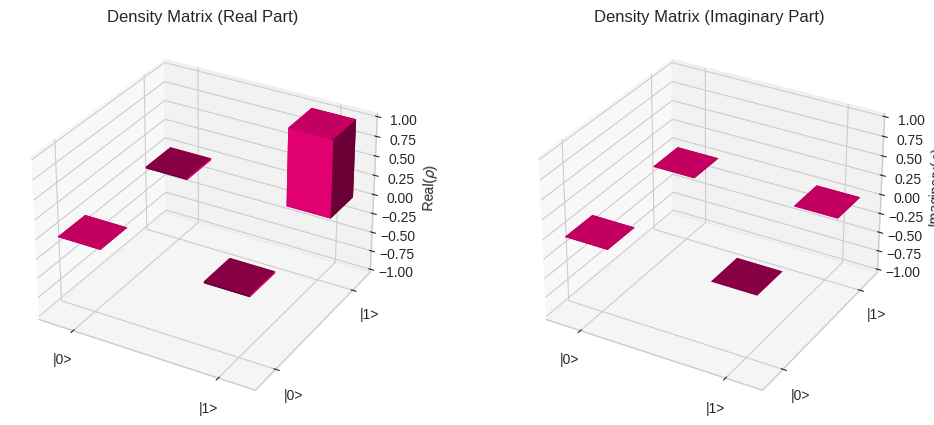

In [100]:
qubit = cirq.LineQubit(0)
result = cirq.experiments.single_qubit_state_tomography(
    sampler=cirq.Simulator(),  # In case of Google QCS or other hardware providers, sampler could point at real hardware.
    qubit=qubit,
    circuit=cirq.Circuit(cirq.Z(qubit), cirq.X(qubit)),
    repetitions=1000,
)
result.plot();